log_quasisymmetry_bin
log(1)-log(5)      21711
log(5)-log(10)     20264
log(0.5)-log(1)     2987
0-log(0.5)          2728
Name: count, dtype: int64


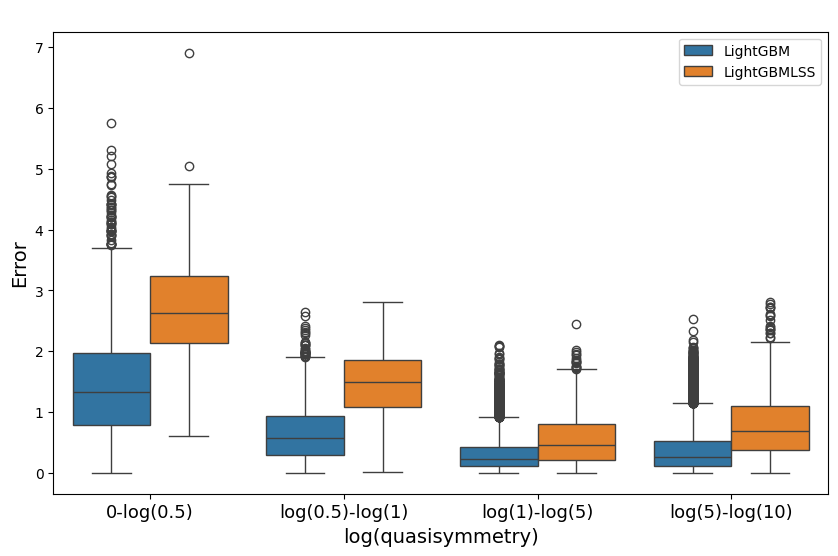

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the errors data
df_lgbm = pd.read_csv('errors_lgbm.csv')
df_lgblss = pd.read_csv('errors_lgblss.csv')

# Merge the DataFrames
df = pd.merge(df_lgbm, df_lgblss, on='quasisymmetry')

# Log-transform quasisymmetry values for bins
log_bins = np.log([0.0001, 0.5, 1, 5, 10])
log_labels = ['0-log(0.5)', 'log(0.5)-log(1)', 'log(1)-log(5)', 'log(5)-log(10)']

# Create bins for log-transformed quasisymmetry
df['log_quasisymmetry'] = df['quasisymmetry']
df['log_quasisymmetry_bin'] = pd.cut(df['log_quasisymmetry'], bins=log_bins, labels=log_labels, include_lowest=True)

# Check the bin counts
print(df['log_quasisymmetry_bin'].value_counts())

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars=['log_quasisymmetry_bin'], value_vars=['errors_lgbm', 'errors_lgblss'], 
                    var_name='Model', value_name='Error')

# Rename the models for better labels
df_melted['Model'] = df_melted['Model'].replace({'errors_lgbm': 'LightGBM', 'errors_lgblss': 'LightGBMLSS'})

# Plot the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='log_quasisymmetry_bin', y='Error', hue='Model', data=df_melted)
plt.title(' ')
plt.xlabel('log(quasisymmetry)', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.legend()
plt.xticks(fontsize=13)  # Adjust the font size of the x-tick labels
plt.savefig('boxplot.pdf')
plt.show()


In [2]:
df_lgbm.describe()

,quasisymmetry,errors_lgbm
count,47690.000000,47690.000000
mean,1.182675,0.418309
std,0.990401,0.458360
min,-5.834546,0.000025
25%,0.732350,0.120818
50%,1.453554,0.276328
75%,1.922345,0.555445
max,2.302573,5.755663


In [3]:
df_lgblss.describe()

,quasisymmetry,errors_lgblss
count,47690.000000,2890.000000
mean,1.182675,0.817668
std,0.990401,0.722588
min,-5.834546,0.000504
25%,0.732350,0.298685
50%,1.453554,0.638834
75%,1.922345,1.107567
max,2.302573,6.910761
